In [20]:
# packages used in this tutorial 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# keras is only to get boston housing data
# boston housing is also here: from sklearn.datasets import load_boston
#import tensorflow as tf
from tensorflow import keras

# gradient boosting 
from xgboost import XGBRegressor

# random forest
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error

<AxesSubplot:>

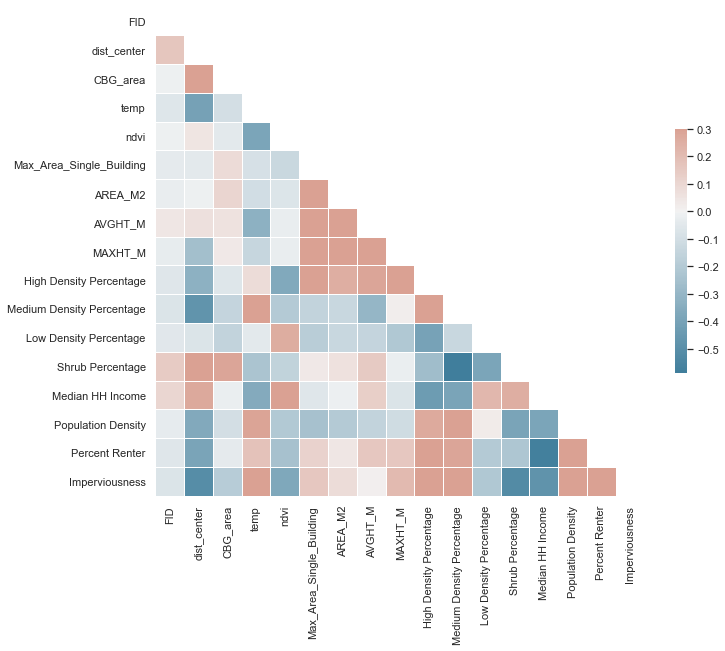

In [5]:
sns.set_theme(style="white")

phoenix_corr = pd.read_csv('FINAL_WINTER_16.csv')

corr = phoenix_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Correlation Between NDVI and LST -0.38529555034872154


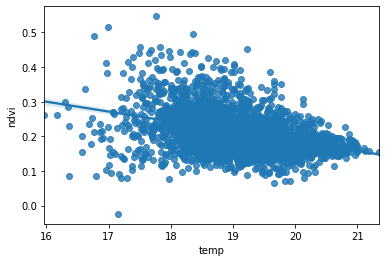

In [2]:
scatter = pd.read_csv('FINAL_WINTER_16.csv')

sns.regplot(x = "temp", y= "ndvi", data = scatter)

correlation = scatter["temp"].corr(scatter["ndvi"])
print("Correlation Between NDVI and LST", correlation)

In [4]:
outputdf = pd.read_csv('FINAL_SUMMER_16.csv')

outputdf.head()

,FID,dist_center,CBG_area,temp,ndvi,ROOFTYPE,Max_Area_Single_Building,Max_Building_Area_Rooftype,AREA_M2,AVGHT_M,MAXHT_M,High Density Percentage,Medium Density Percentage,Low Density Percentage,Shrub Percentage,Median HH Income,Population Density,Percent Renter,Imperviousness
0,1,24994.22184,7.223750e+05,52.085162,0.123584,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0.47,0.10,0.0,31750,2166.075970,0.428571,0.72
1,2,25487.62662,1.743686e+06,49.566783,0.242258,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.33,0.17,0.0,38468,2262.650010,0.130872,0.56
2,3,24783.11030,9.933480e+05,48.918327,0.278729,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.32,0.11,0.0,30350,2158.705047,0.100279,0.51
3,4,24577.48325,7.488106e+05,49.734537,0.254002,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.39,0.08,0.0,45000,3583.860166,0.170520,0.56
4,5,24118.56538,9.447117e+05,47.579724,0.322673,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.32,0.10,0.0,35313,2582.746102,0.220963,0.48


In [21]:
phoenix = pd.read_csv('FINAL_WINTER_16.csv')
phoenix = pd.get_dummies(phoenix)

phoenix.iloc[:,0:].head()

labels = np.array(phoenix['temp'])

phoenix = phoenix.drop('temp', axis = 1)
phoenix = phoenix.drop('ndvi', axis = 1)
phoenix = phoenix.drop('FID', axis = 1)

new_df = phoenix

feature_list = list(phoenix.columns)

phoenix = np.array(phoenix)


In [54]:
new_df

,dist_center,CBG_area,ndvi,Max_Area_Single_Building,AREA_M2,AVGHT_M,MAXHT_M,High Density Percentage,Medium Density Percentage,Low Density Percentage,...,Median HH Income,Population Density,Percent Renter,Imperviousness,ROOFTYPE_Complex,ROOFTYPE_Flat,ROOFTYPE_Pitched,Max_Building_Area_Rooftype_Complex,Max_Building_Area_Rooftype_Flat,Max_Building_Area_Rooftype_Pitched
0,24994.22184,7.223750e+05,0.123584,NaN,NaN,NaN,NaN,0.09,0.47,0.10,...,31750,2166.075970,0.428571,0.72,0,0,0,0,0,0
1,25487.62662,1.743686e+06,0.242258,NaN,NaN,NaN,NaN,0.06,0.33,0.17,...,38468,2262.650010,0.130872,0.56,0,0,0,0,0,0
2,24783.11030,9.933480e+05,0.278729,NaN,NaN,NaN,NaN,0.05,0.32,0.11,...,30350,2158.705047,0.100279,0.51,0,0,0,0,0,0
3,24577.48325,7.488106e+05,0.254002,NaN,NaN,NaN,NaN,0.04,0.39,0.08,...,45000,3583.860166,0.170520,0.56,0,0,0,0,0,0
4,24118.56538,9.447117e+05,0.322673,NaN,NaN,NaN,NaN,0.03,0.32,0.10,...,35313,2582.746102,0.220963,0.48,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,30423.97249,2.107494e+06,0.176610,NaN,NaN,NaN,NaN,0.01,0.19,0.28,...,105521,3335.359913,0.042589,0.47,0,0,0,0,0,0
2501,30505.13767,3.168063e+06,0.155963,NaN,NaN,NaN,NaN,0.02,0.08,0.15,...,146250,1822.972042,0.151874,0.44,0,0,0,0,0,0
2502,30510.45493,2.399271e+06,0.205601,NaN,NaN,NaN,NaN,0.02,0.19,0.32,...,121538,2299.896913,0.204710,0.48,0,0,0,0,0,0
2503,31233.90597,4.088453e+06,0.179351,NaN,NaN,NaN,NaN,0.00,0.09,0.13,...,134408,1375.564575,0.168224,0.45,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(phoenix, labels, test_size = 0.25, random_state = 167)

columns = ['Dist_Center', 'CBG_Area','Max_Area', 'Total_Building_Area', 'Avg. Height', 'Max Height',
                'High Density', 'Medium Density', 'Low Density', 'Shrub', 'Median Income','Pop Density', '% Rent', 'imperviousness', 'complex_height', 'flat_height', 'pitched_height', 'complex_max', 'flat_max', 'pitched_max']

#columns = ['Dist_Center', 'CBG_Area', 'NDVI','Max_Area', 'Total_Building_Area', 'Avg. Height', 'Max Height',
#                'High Density', 'Medium Density', 'Low Density', 'Shrub', 'Median Income','Pop Density', '% Rent', 'imperviousness', 'complex_height', 'flat_height', 'pitched_height', 'complex_max', 'flat_max', 'pitched_max']

           
df = pd.DataFrame(train_features, columns = columns)

train_features = np.nan_to_num(train_features.astype(np.float32))
test_features = np.nan_to_num(test_features.astype(np.float32))
train_labels = np.nan_to_num(train_labels.astype(np.float32))
test_labels = np.nan_to_num(test_labels.astype(np.float32))
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)




Training Features Shape: (1878, 20)
Training Labels Shape: (1878,)
Testing Features Shape: (627, 20)
Testing Labels Shape: (627,)


In [23]:
#======================================================
# setup model parameters, choose RFR or XGB
# if you comment out a parameter it will use default value
#======================================================
# RFR parameters (random forest regression)
params_rfr = {'n_estimators':2000,
              'criterion':'mse', 
              #'ccp_alpha':0.001,
              'max_depth': 110,
              'min_samples_leaf':2,
              'min_samples_split':5,
              'bootstrap':True,
              'max_features': 'auto'}

#params_rfr = {'n_estimators':2000,
#              'criterion':'mse', 
#              #'ccp_alpha':0.001,
#              'max_depth': 110,
#              'min_samples_leaf':2,
#              'min_samples_split':5,
#              'bootstrap':True,
#              'max_features': 'auto'}



# XGB parameters (extreme gradient boosting)

#Excluding NDVI
params_xgb = {'objective': 'reg:squarederror',
              #'base_score': 0.5,     # chosen as median of validation set
              'n_estimators': 2000,  # number of trees to use
              'learning_rate': 0.01, 
              'max_depth': 8,       # how many levels are in each tree
              'min_child_weight': 1,
              'subsample': 1,
              'colsample_bytree': 0.9,
              # REGULARIZATION  alpha (L2) and lambda (L1)
              'reg_alpha': 1,
              'reg_lambda': 0,
             'seed': 42}

#Including NDVI
#params_xgb = {'objective': 'reg:squarederror',
#              #'base_score': 0.5,     # chosen as median of validation set
#              'n_estimators': 2000,  # number of trees to use
#              'learning_rate': 0.01, 
#              'max_depth': 8,       # how many levels are in each tree
#              'min_child_weight': 1,
#              'subsample': 1,
#              'colsample_bytree': 1,
#              # REGULARIZATION  alpha (L2) and lambda (L1)
#              'reg_alpha': 0.1,
#              'reg_lambda': 1.1,
#              'seed': 0}


In [37]:
#FOR TUNING RF
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [22]:
from xgbtune import tune_xgb_model
params = {'eval_metric': 'rmsle'}
params, round_count = tune_xgb_model(params, train_features, train_labels)

tuning pass 0...
computing best round...
best round: 20
tuning max_depth and min_child_weight ...
best loss: 0.009
best max_depth: 8
best min_child_weight: 1
tuning gamma ...
best loss: 0.009
best gamma: 0.0
re-computing best round...
best round: 20
tuning subsample and colsample_bytree ...
best loss: 0.009
best subsample: 1.0
best colsample_bytree: 1.0
fine tuning subsample and colsample_bytree ...
best loss: 0.009
best subsample: 1.0
best colsample_bytree: 1.0
tuning alpha and lambda ...
best loss: 0.0085
best alpha: 0.01
best lambda: 1.1
tuning seed ...
best loss: 0.0085
best seed: 0
{'eval_metric': 'rmsle', 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 1.0, 'colsample_bytree': 1.0, 'alpha': 0.01, 'lambda': 1.1, 'seed': 0}
tuning pass 1...
computing best round...
best round: 27
tuning max_depth and min_child_weight ...
best loss: 0.0062
best max_depth: 8
best min_child_weight: 1
tuning gamma ...
best loss: 0.0062
best gamma: 0.0
re-computing best round...
best ro

In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=167, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)


rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': True}

In [24]:
#======================================================
# define the model, uncomment the one you want to use
#======================================================
#model = RandomForestRegressor(**params_rfr)
model = XGBRegressor(**params_xgb)

In [25]:
%%time
model.fit(train_features, train_labels)

Wall time: 10.8 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=1, reg_lambda=0, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

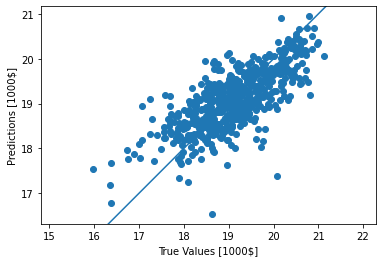

In [26]:
test_predictions = model.predict(test_features)

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

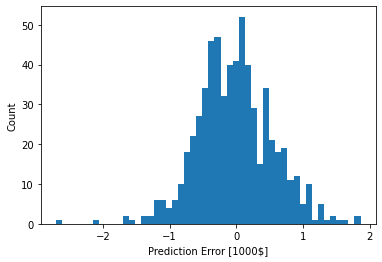

In [27]:
# histogram
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")

In [19]:
mse = mean_squared_error(test_labels, test_predictions)
print(f'the mse is {mse}')

the mse is 0.3214750587940216


In [20]:
from sklearn.metrics import r2_score

y_pred = model.predict(test_features)
R_squared = r2_score(test_labels, y_pred)

R_squared

0.5825535046703778

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = model.predict(test_features)
mean_absolute_percentage_error(test_labels, y_pred)

0.02165581

In [28]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

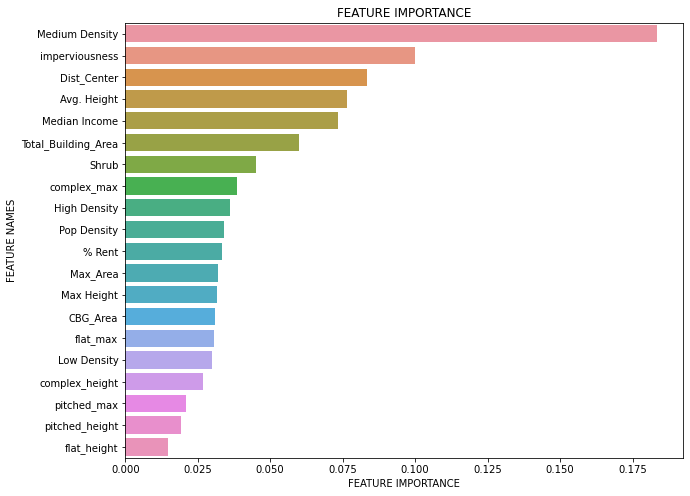

In [29]:
plot_feature_importance(model.feature_importances_, df.columns)